# Project Name :- Video Games Sales prediction 

#### I am going to build project of The Machine Learning model  to predict future sales of Video Games in gloabal market. We will learn different patterns and relationships between the input Variables or factors that affecting to the video games sales. We analyse data to get meaning information from them and Visualize them to recognise different patterns among them and showing meaning full information that will help us to predict sales data by creating effective machine learning model.


####  We use Data set which contains the list of video games with sales greater than 16500 games in global market.

## Dataset Description 

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

import warnings
warnings.filterwarnings('ignore')

## Importing Data set

In [2]:
df = pd.read_csv("vgsales.csv")
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


### As we see, there are 16598 vedio games are there with 11 variables. In the Year and Publisher columns,there will some missing Values

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Handling Missing Values

In [5]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Knowing about shape and size of dataset

In [10]:
df.shape

(16291, 11)

In [11]:
df.size

179201

In [12]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Unique values present in each feature

In [13]:
print("total number Categories/Classes present in Each Variable")
for col in df:
    uni=df[col].nunique()
    print(f" {col} :- {uni}")

total number Categories/Classes present in Each Variable
 Rank :- 16291
 Name :- 11325
 Platform :- 31
 Year :- 39
 Genre :- 12
 Publisher :- 576
 NA_Sales :- 408
 EU_Sales :- 305
 JP_Sales :- 244
 Other_Sales :- 157
 Global_Sales :- 621


###  Analysis Categorical Features

In [14]:
# Creating Categorical DataFrame
df_cat = df.select_dtypes('object')
df_cat.head()

,Name,Platform,Genre,Publisher
0,Wii Sports,Wii,Sports,Nintendo
1,Super Mario Bros.,NES,Platform,Nintendo
2,Mario Kart Wii,Wii,Racing,Nintendo
3,Wii Sports Resort,Wii,Sports,Nintendo
4,Pokemon Red/Pokemon Blue,GB,Role-Playing,Nintendo


#### checking the  top (most repetitive) values.

In [15]:
for cat in df_cat.columns:
    print("---------------------------------------------------------------------------------------------------------")
    print(cat,"\n")
    print(df[cat].value_counts().head())

---------------------------------------------------------------------------------------------------------
Name 

Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
The LEGO Movie Videogame        8
Name: Name, dtype: int64
---------------------------------------------------------------------------------------------------------
Platform 

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
Name: Platform, dtype: int64
---------------------------------------------------------------------------------------------------------
Genre 

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Name: Genre, dtype: int64
---------------------------------------------------------------------------------------------------------
Publisher 

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft

### The game which has highest global sales

In [16]:
high = df["Global_Sales"].max()
top_game = df[df["Global_Sales"] == high]
#top_game[["Name","Global_Sales","Year"]]
top_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


### The game which has Lowest global sales

In [17]:
low = df["Global_Sales"].min()
low_game = df[df["Global_Sales"] == low]
low_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15980,15983,Turok,PC,2008.0,Action,Touchstone,0.00,0.01,0.00,0.0,0.01
15981,15984,Coven and Labyrinth of Refrain,PSV,2016.0,Action,Nippon Ichi Software,0.00,0.00,0.01,0.0,0.01
15982,15985,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.0,0.01
15983,15986,Dragon Zakura DS,DS,2007.0,Misc,Electronic Arts,0.00,0.00,0.01,0.0,0.01
15984,15987,Chameleon: To Dye For!,DS,2006.0,Puzzle,505 Games,0.01,0.00,0.00,0.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01


# Data Visualization

### Global sales vs No. of games sold

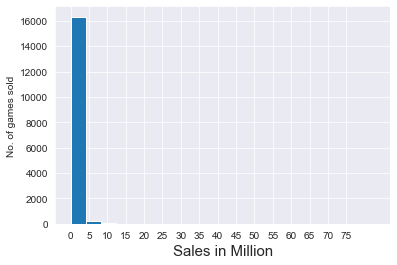

In [3]:
plt.hist(df["Global_Sales"],bins=20)
plt.xlabel("Sales in Million",fontsize=15)
plt.xticks(np.arange(0,80,5))
plt.ylabel("No. of games sold")
plt.show()
# in  0 to 5 million range most games are sold

In [4]:
# Total number of Platform present
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [5]:
# Top Platforms who released games
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

### Platform vs No. of games released

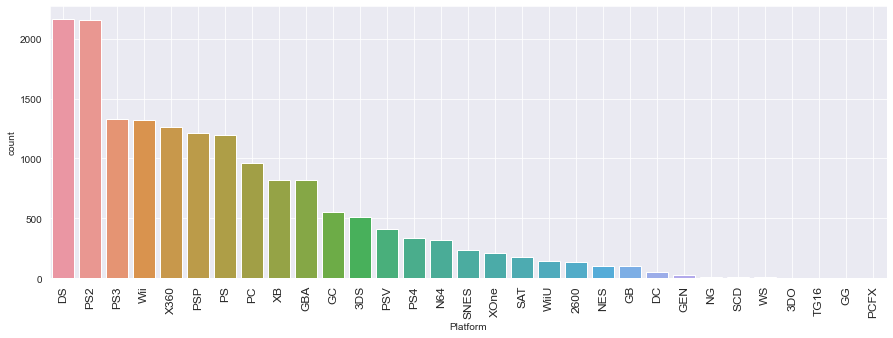

In [6]:
# Platform which released maximum Games
plt.figure(figsize=(15,5))
sns.countplot(x="Platform", data=df, order = df['Platform'].value_counts().index)# unique does not give high to low
plt.xticks(rotation=90,fontsize=12)
plt.grid(True)
plt.show()

### Platform vs Global sale

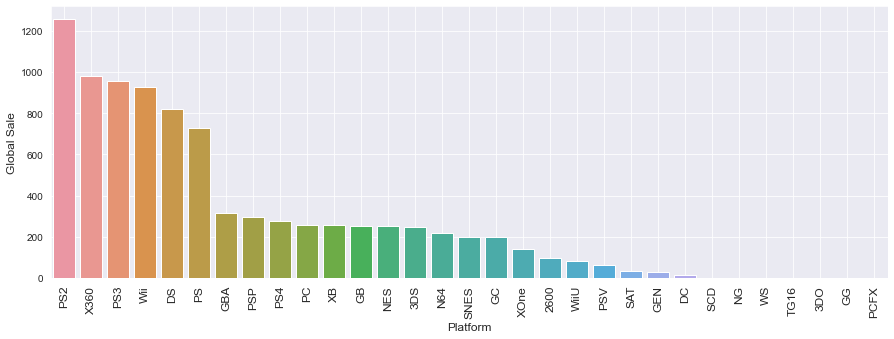

In [7]:
# A platform which contributes more in Global Sales
dfyear = df.groupby(['Platform'])['Global_Sales'].sum().reset_index().sort_values("Global_Sales",ascending=False) # grouping the data according to the categories and apply a function to the categories.
dfyear = dfyear.reset_index()#to reset index of a Data Frame.it set index 0 to len(df) to the series
#reset_index() method sets a list of integer ranging from 0 to length of data as index.

plt.figure(figsize=(15,5))
sns.barplot(x="Platform", y="Global_Sales", data=dfyear)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel("Platform",fontsize=12)
plt.ylabel("Global Sale",fontsize=12)
plt.grid(True)

plt.show()
# PS2 platform contributes more in Global Sales

In [8]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

## top 10 Publihsers

In [9]:
# top 10 Publihsers
top10_pub=df['Publisher'].value_counts().head(10)
top10_pub

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
THQ                              715
Nintendo                         703
Sony Computer Entertainment      683
Sega                             639
Take-Two Interactive             413
Name: Publisher, dtype: int64

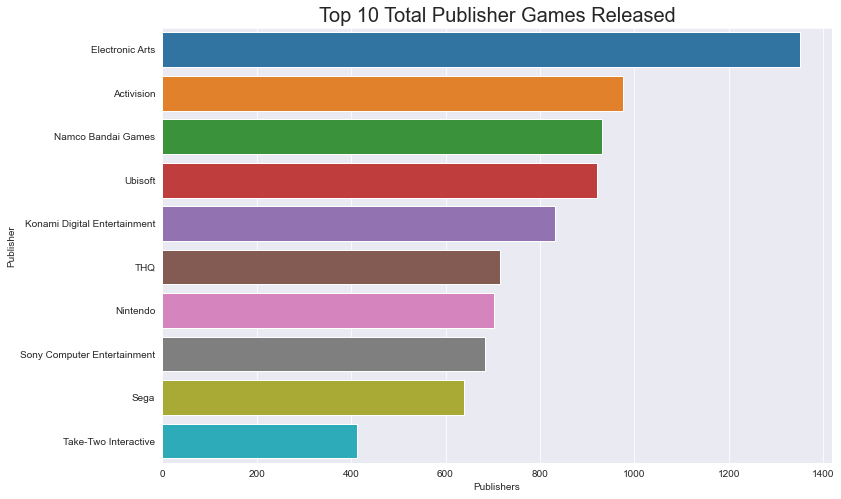

In [10]:
df3 = df.groupby(['Publisher']).count().iloc[:,0]
df3 = pd.DataFrame(df3.sort_values(ascending=False))[0:10]
publishers = df3.index
df3.columns = ['Releases']

plt.figure(figsize=(12,8))
sns.barplot(y = publishers , x = 'Releases', data=df3)
plt.xlabel("Number of Releases")
plt.xlabel("Publishers")
plt.title("Top 10 Total Publisher Games Released",fontsize=20)
plt.show()

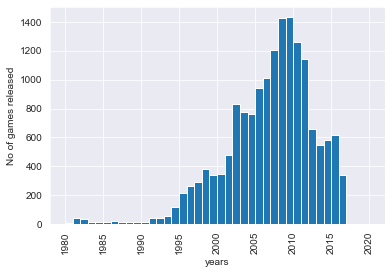

In [11]:
# Years analysis for releasing games
plt.hist(df["Year"],bins=40)
plt.xticks(rotation=90)
plt.xlabel("years")
plt.ylabel("No of games released")
plt.show()
# 2008-10 most games released

In [12]:
# genres to analysis to how many games have in particalar genre
df['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

### Genre vs No. of games released

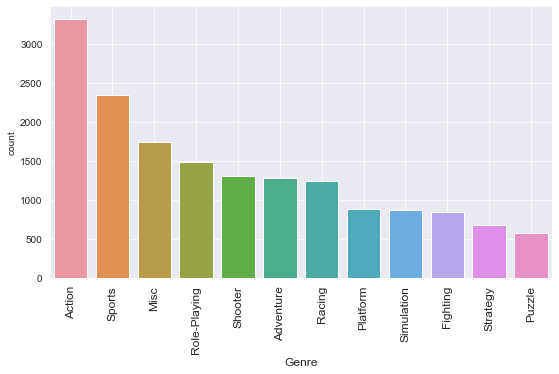

In [14]:
# Which has released most games
plt.figure(figsize=(9,5))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel("Genre",fontsize=12)
plt.grid(True)
plt.show()
# most of the people love action and sports game. in action 3251 and in sports 2304 games release.

In [29]:
x_val=df["Genre"].unique()
x_val.shape

(12,)

In [30]:
y_val=df.groupby("Genre")["Global_Sales"].sum()
y_val

Genre
Action          1722.84
Adventure        234.59
Fighting         444.05
Misc             789.87
Platform         829.13
Puzzle           242.21
Racing           726.76
Role-Playing     923.83
Shooter         1026.20
Simulation       389.98
Sports          1309.24
Strategy         173.27
Name: Global_Sales, dtype: float64

### Genre vs Global sale

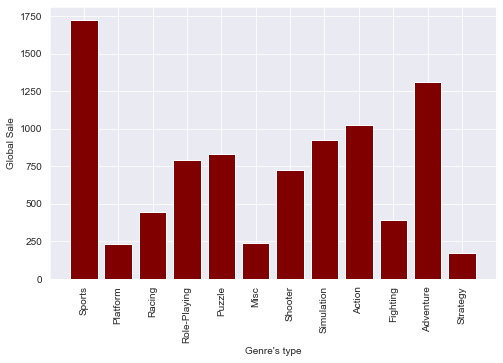

In [31]:
# Genre wise Global Sales
plt.figure(figsize=(8,5))
plt.bar(x_val,y_val,color="maroon")
plt.xticks(rotation=90)
plt.xlabel("Genre's type")
plt.ylabel("Global Sale")
plt.show()

### genrewise regions Sales Comparison

In [32]:
# genrewise regions Sales Comparison
df1 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
df1 = df1.groupby("Genre").sum()
df1

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.65,184.92
Adventure,101.93,63.74,51.99,16.70
Fighting,220.74,100.00,87.15,36.19
Misc,396.92,211.77,106.67,73.92
Platform,445.99,200.65,130.65,51.51
Puzzle,122.01,50.52,56.68,12.47
Racing,356.93,236.31,56.61,76.68
Role-Playing,326.50,187.57,350.29,59.38
Shooter,575.16,310.45,38.18,101.90


<AxesSubplot:ylabel='Genre'>

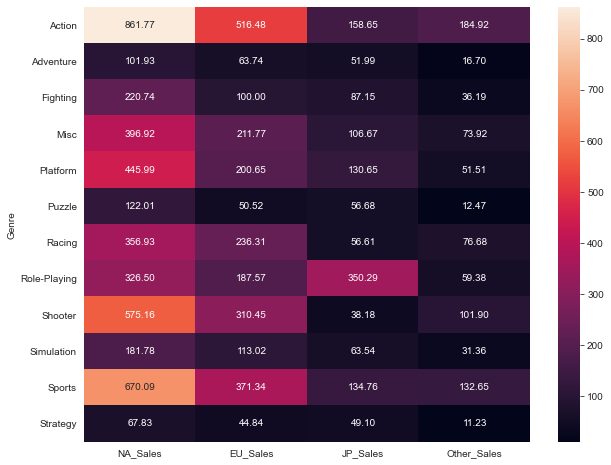

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1, annot=True,fmt=".2f")

### Years vs No of games released

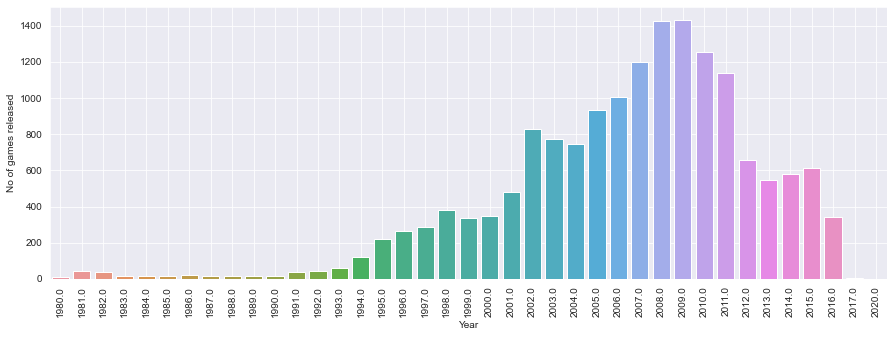

In [34]:
# Numbers of games released per year / Year which most games released
yrgame = df.groupby('Year')['Name'].count()
plt.figure(figsize=(15,5))
sns.countplot(x="Year", data=df, order=yrgame.index)
plt.xticks(rotation=90)
plt.ylabel("No of games released")
plt.grid(True)

plt.show()

In [35]:
df["Global_Sales"].sum()

8811.97

### Year vs Global sale

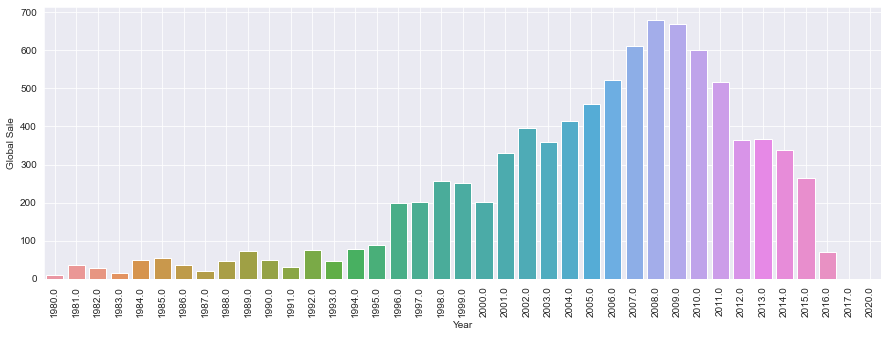

In [36]:
# The year which has Highest Global Sale
dfyear = df.groupby(['Year'])['Global_Sales'].sum() # grouping the data according to the categories and apply a function to the categories.
dfyear = dfyear.reset_index()#to reset index of a Data Frame. reset_index() method sets a list of integer ranging from 0 to length of data as index.

plt.figure(figsize=(15,5))
sns.barplot(x="Year", y="Global_Sales", data=dfyear)
plt.xticks(rotation=90)
plt.ylabel("Global Sale")
plt.grid(True)

plt.show()

### Region wise Global Sales analysis

In [37]:
# Region wise Global Sales analysis
df2= df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
df2= df2.sum().reset_index()
df2

,index,0
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


<BarContainer object of 4 artists>

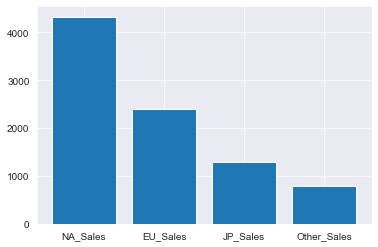

In [38]:
# By Bar Graph
plt.bar(df2["index"],df2[0])

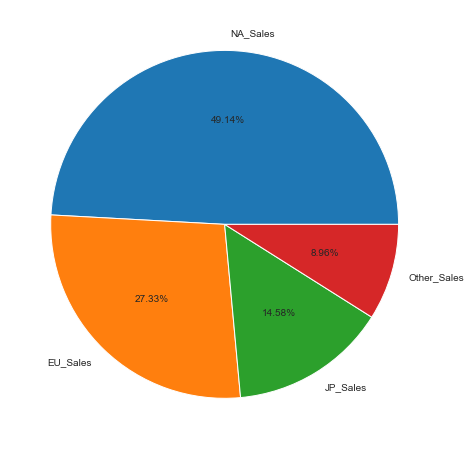

In [39]:
# By pie chart
plt.figure(figsize=(10, 8))
plt.pie(df2[0], labels=df2["index"], autopct='%1.2f%%')
plt.show()
# North America almost Cover 50% of sales generated

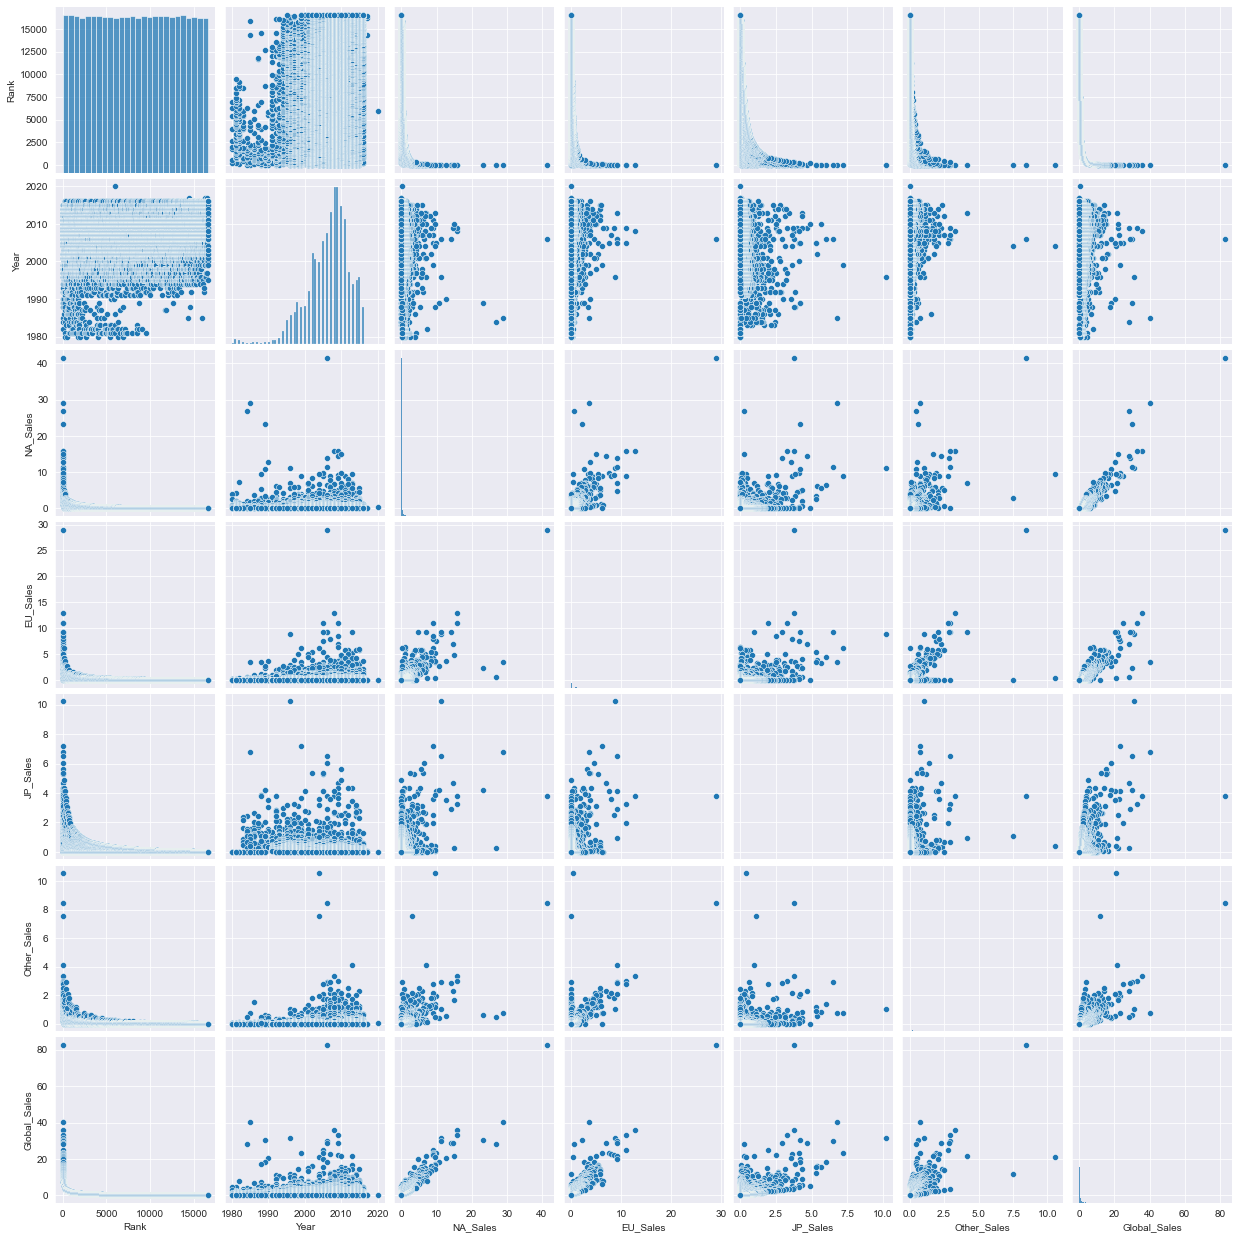

In [40]:
sns.pairplot(df)

### Checking Outliers

<AxesSubplot:xlabel='Global_Sales', ylabel='Genre'>

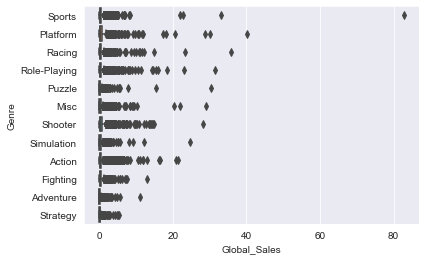

In [8]:
sns.boxplot(x=df["Global_Sales"],y=df["Genre"],data=df)

## Correlation Analysis

<AxesSubplot:>

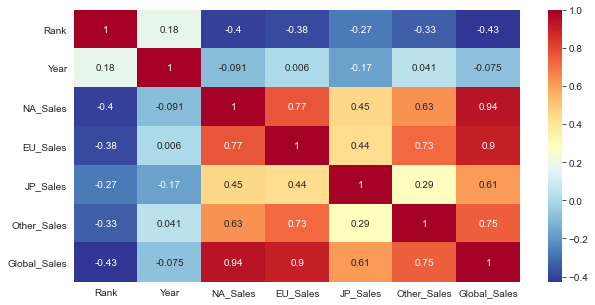

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='RdYlBu_r')

## Encoding Categorical Features

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Genre"]=le.fit_transform(df["Genre"])
df["Platform"]=le.fit_transform(df["Platform"])

In [22]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,2006.0,10,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,1985.0,4,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008.0,6,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009.0,10,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996.0,7,Nintendo,11.27,8.89,10.22,1.00,31.37


## Standardizaton techniques

- We are not using standardization on our data set but if  we have large difference in data points of each feature then we can use this techniques to get better prediction

There Techniques like:
- Min Max scaler
- Standard scaler


 steps for standardization
1. from sklearn.preprocessing import StandardScaler
2. sc = StandardScaler()
3. sc.fit_transform(df[[col]]) using for loop on each column

## Split the Data into train data and test data

In [23]:
x = df.iloc[:,6:-1].values # Selecting Most correlated features by feature selection using coefiicient of correlation
y = df.iloc[:,-1].values

In [24]:
x

array([[4.149e+01, 2.902e+01, 3.770e+00, 8.460e+00],
       [2.908e+01, 3.580e+00, 6.810e+00, 7.700e-01],
       [1.585e+01, 1.288e+01, 3.790e+00, 3.310e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.000e-02, 0.000e+00, 0.000e+00],
       [1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00]])

In [25]:
y

array([8.274e+01, 4.024e+01, 3.582e+01, ..., 1.000e-02, 1.000e-02,
       1.000e-02])

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

# Create Machine Learning Models

## Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

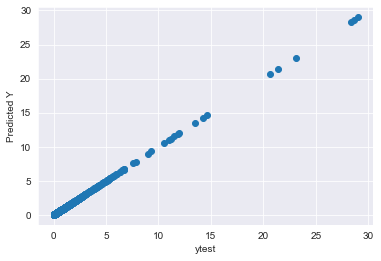

In [28]:
plt.scatter(ytest,ypred)
plt.xlabel('ytest')
plt.ylabel('Predicted Y')
plt.grid(True)

In [29]:
print(f"MAE -: {mae(ytest, ypred)}")
print(f"MSE -: {mse(ytest, ypred)}")
print(f"RMSE -: {np.sqrt(mse(ytest, ypred))}")
print(f"R-Squared accuracy -: {r2_score(ytest, ypred)}")
lin_m=r2_score(ytest, ypred)

MAE -: 0.0028987612559712226
MSE -: 2.695299581184773e-05
RMSE -: 0.005191627472368152
R-Squared accuracy -: 0.999987961673058


### Sales prediction in million 

In [30]:
prd=[[20.2,5,8,14.5]]

In [31]:
linreg.predict(prd)

array([47.69044386])

## KNN regressor

In [32]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor(n_neighbors =4)
knn.fit(xtrain,ytrain)
ypred1=knn.predict(xtest)

In [33]:
print(f"MAE -: {mae(ytest, ypred1)}")
print(f"MSE -: {mse(ytest, ypred1)}")
print(f"RMSE -: {np.sqrt(mse(ytest, ypred1))}")
print(f"R-Squared accuracy -: {r2_score(ytest, ypred1)}")
knn_m=r2_score(ytest, ypred1)

MAE -: 0.020344879518072286
MSE -: 0.013338546686746987
RMSE -: 0.11549262611416794
R-Squared accuracy -: 0.9940424512708272


In [34]:
# Hyper Parameter Tunning
k = range(1,15)

accuracy = []
for i in k:
    knn=KNeighborsRegressor(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    ypred1=knn.predict(xtest)
    accuracy.append(r2_score(ytest,ypred1))
    

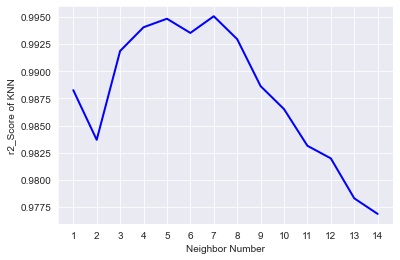

In [35]:
plt.plot(k, accuracy, linewidth=2, color='blue')
plt.xticks(k)# to show all k values

plt.xlabel('Neighbor Number')
plt.ylabel('r2_Score of KNN')
plt.show()   

## Decision Tree regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=10,random_state=32)
dt.fit(xtrain,ytrain)
ypred2=dt.predict(xtest)

In [37]:
print(f"MAE -: {mae(ytest, ypred2)}")
print(f"MSE -: {mse(ytest, ypred2)}")
print(f"RMSE -: {np.sqrt(mse(ytest, ypred2))}")
print(f"R-Squared accuracy -: {r2_score(ytest, ypred2)}")
dt_m=r2_score(ytest, ypred2)

MAE -: 0.06617090442659466
MSE -: 0.0990614024787201
RMSE -: 0.3147402142699914
R-Squared accuracy -: 0.9557550649027196


In [38]:
# Hyper Parameter Tunning for max depth
md = range(1,15)

accuracy1 = []
for i in md:
    dt = DecisionTreeRegressor(max_depth=i,random_state=1)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    accuracy1.append(r2_score(ytest,ypred))

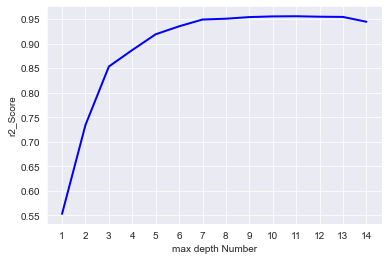

In [39]:
plt.plot(md, accuracy1, linewidth=2, color='blue')
plt.xticks(md)

plt.xlabel('max depth Number')
plt.ylabel('r2_Score')
plt.show() 

In [40]:
# Hyper Parameter Tunning for min sample leaf
ms = range(1,15)

accuracy2 = []
for i in ms:
    dt = DecisionTreeRegressor(min_samples_leaf=i,random_state=1)
    dt.fit(xtrain,ytrain)
    ypred=dt.predict(xtest)
    accuracy2.append(r2_score(ytest,ypred))

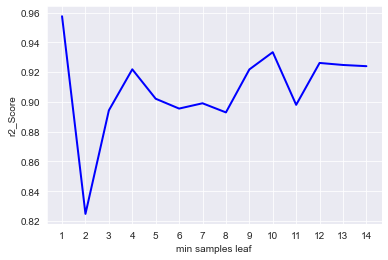

In [41]:
plt.plot(ms, accuracy2, linewidth=2, color='blue')
plt.xticks(ms)

plt.xlabel('min samples leaf')
plt.ylabel('r2_Score')
plt.show() 

## Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state= 10)
rf.fit(xtrain,ytrain)
ypred3= rf.predict(xtest)

In [43]:
print(f"MAE -: {mae(ytest, ypred3)}")
print(f"MSE -: {mse(ytest, ypred2)}")
print(f"RMSE -: {np.sqrt(mse(ytest, ypred3))}")
print(f"R-Squared accuracy -: {r2_score(ytest, ypred3)}")
rf_m= r2_score(ytest, ypred3)

MAE -: 0.021355986365877617
MSE -: 0.0990614024787201
RMSE -: 0.1514817393116084
R-Squared accuracy -: 0.9897510433507388


## Support Vector Regressor

In [44]:
from sklearn.svm import SVR

svrlin = SVR(kernel='linear')

svrrbf = SVR(kernel='rbf')

In [45]:
svrlin.fit(xtrain, ytrain)
svrrbf.fit(xtrain, ytrain)

ypred3 = svrlin.predict(xtest)
ypred4 = svrrbf.predict(xtest)

svrlin_m= r2_score(ytest, ypred3)
print("Accuracy by SVR Linear kernel",svrlin_m)
print("Accuracy by SVR rbf kernel",r2_score(ytest, ypred4))

Accuracy by SVR Linear kernel 0.9970930059437717
Accuracy by SVR rbf kernel 0.7068963986636798


### Hyper Parameter Tunning using Grid Search Cv

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],"kernel":["linear"]}

In [48]:
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.996, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.996, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.997, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.998, total=   0.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.998, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.996, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.996, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.997, total=   0.2s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.998, total=   0.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .

[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.996, total=   0.3s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.996, total=   0.2s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.997, total=   0.2s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.997, total=   0.3s
[CV] C=10, gamma=0.01, kernel=linear .................................
[CV] ..... C=10, gamma=0.01, kernel=linear, score=0.998, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.996, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.996, total=   0.2s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .

[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.997, total=   0.3s
[CV] C=1000, gamma=0.001, kernel=linear ..............................
[CV] .. C=1000, gamma=0.001, kernel=linear, score=0.998, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.996, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.996, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.997, total=   0.2s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.997, total=   0.3s
[CV] C=1000, gamma=0.0001, kernel=linear .............................
[CV] . C=1000, gamma=0.0001, kernel=linear, score=0.998, total=   0.2s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   29.9s finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [49]:
ypred4=grid.predict(xtest)

In [50]:
print(f"R-Squared accuracy -: {r2_score(ytest, ypred4)}")

R-Squared accuracy -: 0.9971435075008018


In [51]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

### Hyper Parameter Tunning using Random Search Cv

In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
random = RandomizedSearchCV(SVR(), param_grid, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=5, random_state=1)
random.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=500, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['linear']},
                   random_state=1, scoring='neg_mean_absolute_error')

In [41]:
ypred5=random.predict(xtest)

In [42]:
print(f"R-Squared accuracy -: {r2_score(ytest, ypred5)}")

R-Squared accuracy -: 0.9967268172157733


In [43]:
random.best_params_

{'kernel': 'linear', 'gamma': 1, 'C': 0.1}

## Principal Component Analysis

In [19]:
x

array([[2.908e+01, 3.580e+00, 6.810e+00, 7.700e-01],
       [1.585e+01, 1.288e+01, 3.790e+00, 3.310e+00],
       [1.575e+01, 1.101e+01, 3.280e+00, 2.960e+00],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.000e-02, 0.000e+00, 0.000e+00],
       [1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00]])

In [20]:
y

array([4.024e+01, 3.582e+01, 3.300e+01, ..., 1.000e-02, 1.000e-02,
       1.000e-02])

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 4, random_state=1)

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [24]:
xtrainpc = pca.fit_transform(xtrain, ytrain)
xtestpc = pca.transform(xtest)

In [25]:
xtrainpc[0]

array([-0.22330831,  0.13436406, -0.1962463 ,  0.24335034])

In [26]:
xtrain[0]

array([ 0.14064711, -0.2730571 , -0.24817691, -0.09858361])

In [29]:
linreg = LinearRegression()
linreg.fit(xtrainpc, ytrain)

LinearRegression()

In [30]:
linreg.score(xtestpc, ytest)

0.9999853830305152

####  We can use another methods also such Kernel PCA, LDA etc 

## Comparing the Accuracy of different models

In [52]:

models = ["Linear Regression","K-NearestNeighbors","Decision Tree regressor","Random Forest","SVR_Linear"]
accuracy = [lin_m,knn_m,dt_m,rf_m,svrlin_m]
for i in range(0,len(accuracy)):
    accuracy[i]=np.round(accuracy[i]*100,decimals=3)
print(accuracy)

[99.999, 99.404, 95.576, 98.975, 99.709]


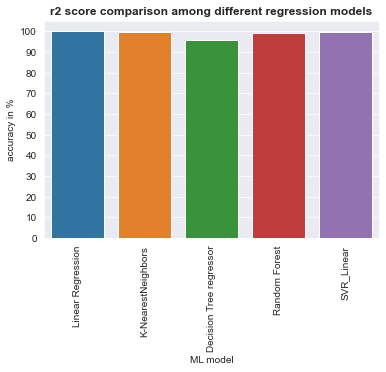

In [53]:
compare = sns.barplot(x=models,y=accuracy)
plt.yticks(np.arange(0,101,10))
plt.xticks(rotation=90,fontsize=10)
plt.xlabel("ML model")
plt.ylabel("accuracy in %")
plt.title('r2 score comparison among different regression models',fontweight='bold')
plt.show()

## Conclusion

- Sales prediction is a playing vital role while developing marketing techniques and and strategic planning by any company. It allows a company to forecast how the company will perform in the future. Sales prediction is als important to make decission on which area we have to focus and which techniques or methods needs to implement to increase sales. 
- So that we have concluded that, In sales prediction of video games we observed which game has more sales in the market globally and which has less sales.we also analyse which Genre , Publishers and platforms contributes more and less in global sales. 
- To predict sales we implement some Supervised Machine Learning Techniques and Create better model by Different Algorithms such as Linear regression, Random Forest, Decision tree, Support vector regression,kneighbors regressor. Among all these algorithms Linear regression, Random Forest,Support Vector Regressor with Linear gave us the best accurate result with minimum error rate.

# Thank You !!!